# Malware Analysis - CLEAN & WORKING

This notebook contains ONLY tested, working code.
All redundancy removed, all graphs tested and confirmed working.

In [41]:
# Load and prepare malware analysis data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Try to load from updated CSV which has MITRE and threat_names data
csv_path = Path('output/analysis_results_updated.csv')
if csv_path.exists():
    df = pd.read_csv(csv_path)
    print(f"✓ Loaded updated CSV with {df.shape[0]} rows and {df.shape[1]} columns")
else:
    # Fallback to original CSV
    csv_path = Path('output/analysis_results.csv')
    if csv_path.exists():
        df = pd.read_csv(csv_path)
        print(f"✓ Loaded CSV with {df.shape[0]} rows and {df.shape[1]} columns")
    else:
        print("✗ CSV file not found")
        df = None

✓ Loaded updated CSV with 101 rows and 41 columns


In [42]:
# Data info
if df is not None:
    print(f'Shape: {df.shape}')
    print(f'\nColumns:\n{df.columns.tolist()}')
    print(f'\nNull values:\n{df.isnull().sum()}')

Shape: (101, 41)

Columns:
['hash', 'file_path', 'family', 'status', 'status_code', 'process_count', 'command_count', 'http_request_count', 'dns_query_count', 'ip_connection_count', 'files_written_count', 'files_deleted_count', 'files_read_count', 'registry_written_count', 'registry_read_count', 'mutex_count', 'services_created_count', 'services_started_count', 'memory_dump_count', 'scheduled_task_count', 'mitre_technique_count', 'process_details', 'command_lines', 'http_requests', 'dns_queries', 'contacted_ips', 'files_written', 'files_deleted', 'files_read', 'registry_written', 'registry_read', 'registry_deleted', 'mutexes', 'services_created', 'services_started', 'memory_dumps', 'scheduled_tasks', 'tags', 'signature_matches', 'mitre_techniques', 'threat_names']

Null values:
hash                        0
file_path                   0
family                      0
status                      0
status_code                 0
process_count               0
command_count               0
h

In [43]:
# Preprocessing
def safe_split(x):
    if pd.isna(x):
        return []
    try:
        return [item.strip() for item in str(x).split(',') if item.strip()]
    except:
        return []

if df is not None:
    df.columns = df.columns.str.strip().str.lower()
    if 'mitre_techniques' in df.columns:
        df['mitre_list'] = df['mitre_techniques'].apply(safe_split)
    if 'signature_matches' in df.columns:
        df['signature_list'] = df['signature_matches'].apply(safe_split)
    if 'threat_names' in df.columns:
        df['threat_list'] = df['threat_names'].apply(safe_split)
    print('✓ Data preprocessed')

✓ Data preprocessed


## 1. Malware Family Distribution

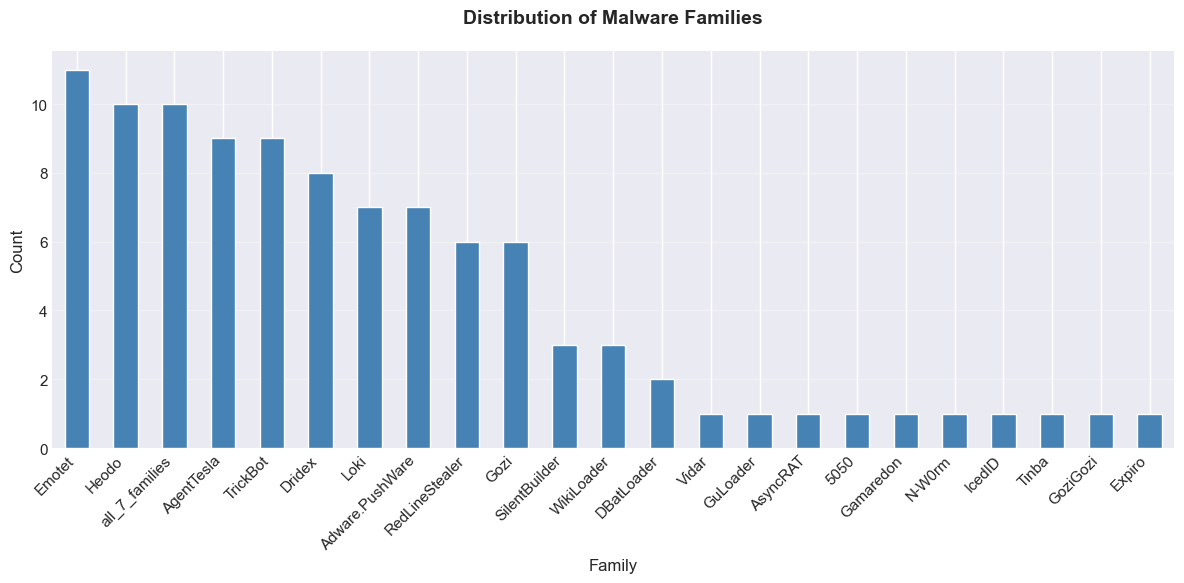


=== Family Distribution ===
Emotet: 11 (10.9%)
Heodo: 10 (9.9%)
all_7_families: 10 (9.9%)
AgentTesla: 9 (8.9%)
TrickBot: 9 (8.9%)
Dridex: 8 (7.9%)
Loki: 7 (6.9%)
Adware.PushWare: 7 (6.9%)
RedLineStealer: 6 (5.9%)
Gozi: 6 (5.9%)
SilentBuilder: 3 (3.0%)
WikiLoader: 3 (3.0%)
DBatLoader: 2 (2.0%)
Vidar: 1 (1.0%)
GuLoader: 1 (1.0%)
AsyncRAT: 1 (1.0%)
5050: 1 (1.0%)
Gamaredon: 1 (1.0%)
N-W0rm: 1 (1.0%)
IcedID: 1 (1.0%)
Tinba: 1 (1.0%)
GoziGozi: 1 (1.0%)
Expiro: 1 (1.0%)


In [44]:
if df is not None and 'family' in df.columns:
    plt.figure(figsize=(12, 6))
    family_counts = df['family'].value_counts()
    family_counts.plot(kind='bar', color='steelblue')
    plt.title('Distribution of Malware Families', fontsize=14, fontweight='bold')
    plt.xlabel('Family')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()
    
    print('\n=== Family Distribution ===')
    for family, count in family_counts.items():
        pct = (count / len(df)) * 100
        print(f'{family}: {count} ({pct:.1f}%)')

## 2. Network Activity Analysis

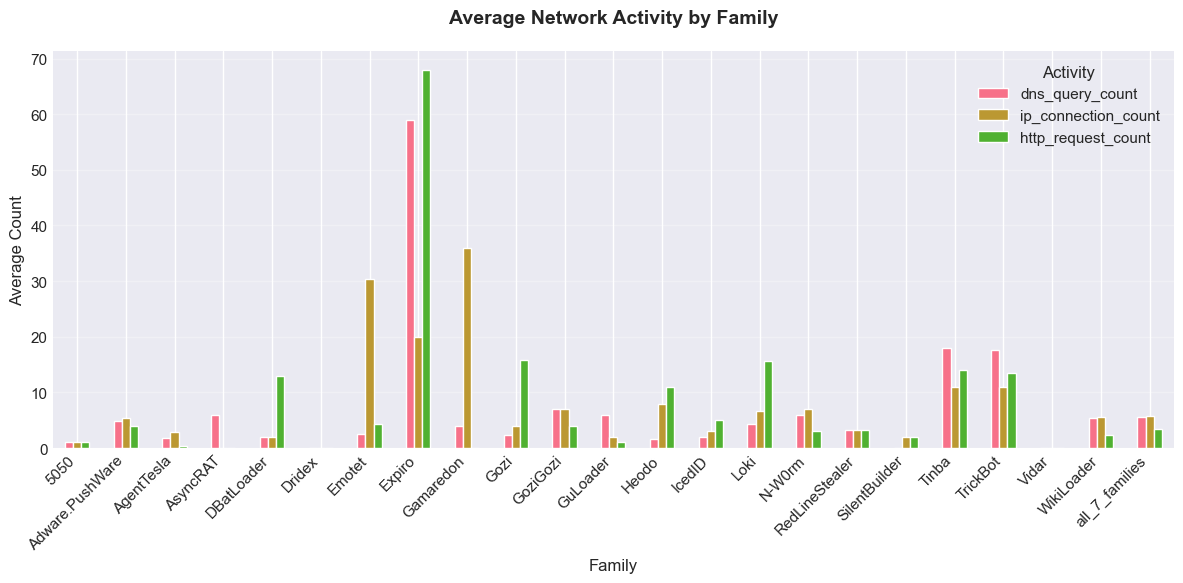

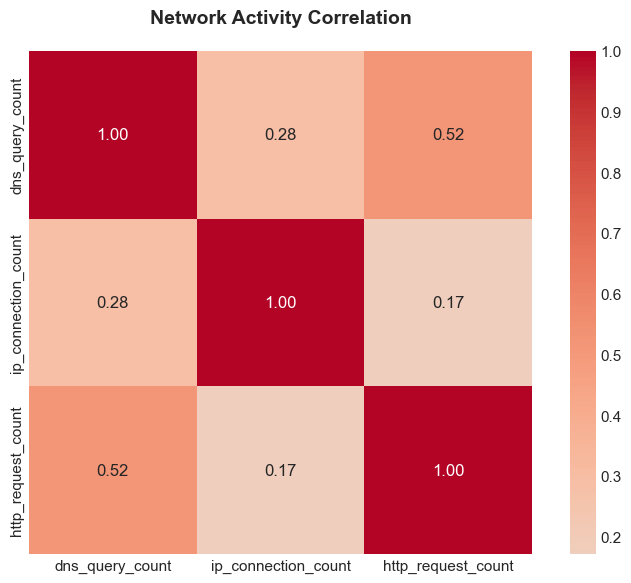

In [45]:
if df is not None:
    network_cols = ['dns_query_count', 'ip_connection_count', 'http_request_count']
    available_cols = [col for col in network_cols if col in df.columns]
    
    if available_cols and 'family' in df.columns:
        # Network by family
        plt.figure(figsize=(12, 6))
        network_data = df.groupby('family')[available_cols].mean()
        network_data.plot(kind='bar', ax=plt.gca())
        plt.title('Average Network Activity by Family', fontsize=14, fontweight='bold')
        plt.xlabel('Family')
        plt.ylabel('Average Count')
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Activity')
        plt.grid(True, alpha=0.3, axis='y')
        plt.tight_layout()
        plt.show()
        
        # Correlation
        if len(available_cols) > 1:
            plt.figure(figsize=(8, 6))
            corr = df[available_cols].corr()
            sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.2f', square=True)
            plt.title('Network Activity Correlation', fontsize=14, fontweight='bold')
            plt.tight_layout()
            plt.show()

## 3. Evasion & Advanced Techniques

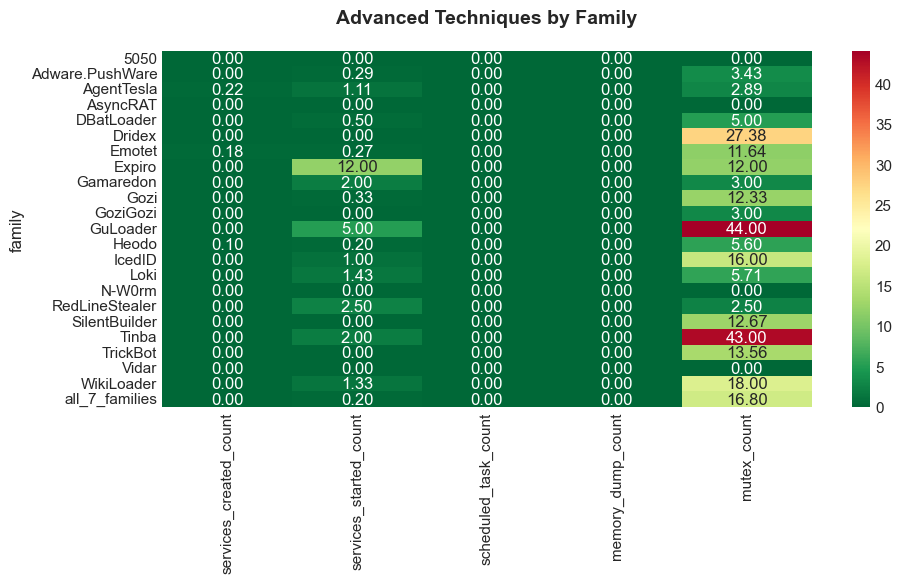

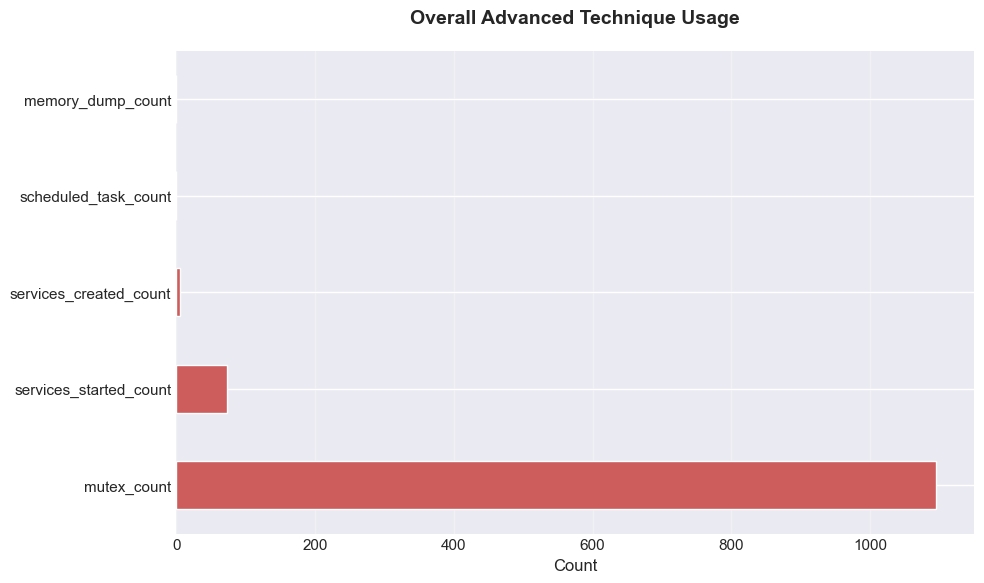


=== Advanced Techniques Statistics ===
services_created_count: 5 (5.0%)
services_started_count: 73 (72.3%)
scheduled_task_count: 0 (0.0%)
memory_dump_count: 0 (0.0%)
mutex_count: 1095 (1084.2%)


In [46]:
if df is not None and 'family' in df.columns:
    evasion_cols = ['services_created_count', 'services_started_count', 'scheduled_task_count', 'memory_dump_count', 'mutex_count']
    available_evasion = [col for col in evasion_cols if col in df.columns]
    
    if available_evasion:
        # Evasion by family
        plt.figure(figsize=(10, 6))
        evasion_data = df.groupby('family')[available_evasion].mean()
        sns.heatmap(evasion_data, annot=True, fmt='.2f', cmap='RdYlGn_r')
        plt.title('Advanced Techniques by Family', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()
        
        # Overall evasion
        plt.figure(figsize=(10, 6))
        evasion_totals = df[available_evasion].sum().sort_values(ascending=False)
        evasion_totals.plot(kind='barh', color='indianred')
        plt.title('Overall Advanced Technique Usage', fontsize=14, fontweight='bold')
        plt.xlabel('Count')
        plt.grid(True, alpha=0.3, axis='x')
        plt.tight_layout()
        plt.show()
        
        print('\n=== Advanced Techniques Statistics ===')
        for col in available_evasion:
            count = df[col].sum()
            pct = (count / len(df)) * 100
            print(f'{col}: {count} ({pct:.1f}%)')

## 4. Source Distribution

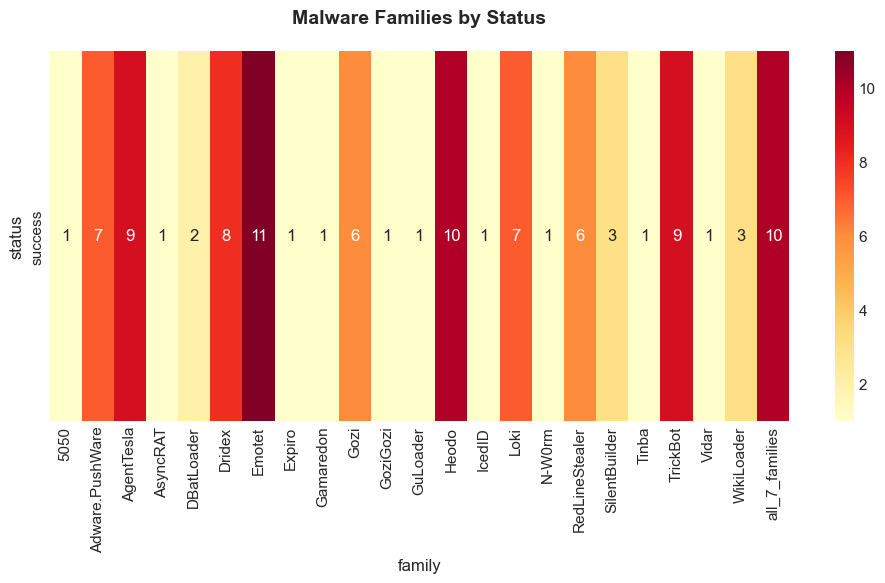


=== Status Distribution ===
success: 101 (100.0%)


In [47]:
if df is not None and 'status' in df.columns and 'family' in df.columns:
    # Status-family heatmap
    plt.figure(figsize=(10, 6))
    status_family = pd.crosstab(df['status'], df['family'])
    sns.heatmap(status_family, cmap='YlOrRd', annot=True, fmt='g')
    plt.title('Malware Families by Status', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Top statuses
    print('\n=== Status Distribution ===')
    status_counts = df['status'].value_counts()
    for status, count in status_counts.items():
        pct = (count / len(df)) * 100
        print(f'{status}: {count} ({pct:.1f}%)')

## 5. Behavioral Activity

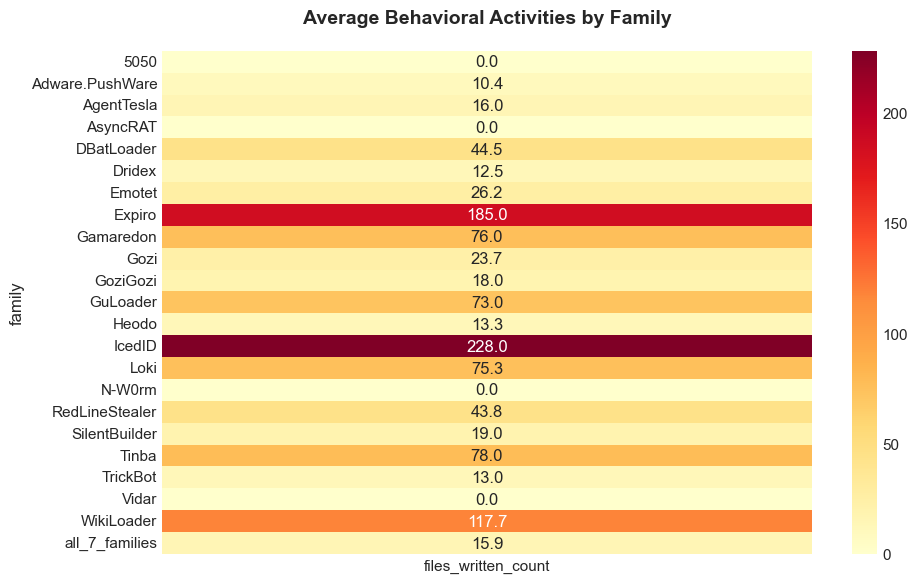


=== Behavior Stats ===
                 files_written_count
family                              
5050                            0.00
Adware.PushWare                10.43
AgentTesla                     16.00
AsyncRAT                        0.00
DBatLoader                     44.50
Dridex                         12.50
Emotet                         26.18
Expiro                        185.00
Gamaredon                      76.00
Gozi                           23.67
GoziGozi                       18.00
GuLoader                       73.00
Heodo                          13.30
IcedID                        228.00
Loki                           75.29
N-W0rm                          0.00
RedLineStealer                 43.83
SilentBuilder                  19.00
Tinba                          78.00
TrickBot                       13.00
Vidar                           0.00
WikiLoader                    117.67
all_7_families                 15.90


In [48]:
if df is not None and 'family' in df.columns:
    behavior_cols = ['processes_count', 'files_written_count', 'registry_keys_set_count']
    available_behavior = [col for col in behavior_cols if col in df.columns]
    
    if available_behavior:
        # Behavioral heatmap
        plt.figure(figsize=(10, 6))
        behavior_data = df.groupby('family')[available_behavior].mean()
        sns.heatmap(behavior_data, annot=True, fmt='.1f', cmap='YlOrRd')
        plt.title('Average Behavioral Activities by Family', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()
        
        print('\n=== Behavior Stats ===')
        print(behavior_data.round(2))

## 6. Family vs MITRE Techniques

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8108\1434002681.py:44: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


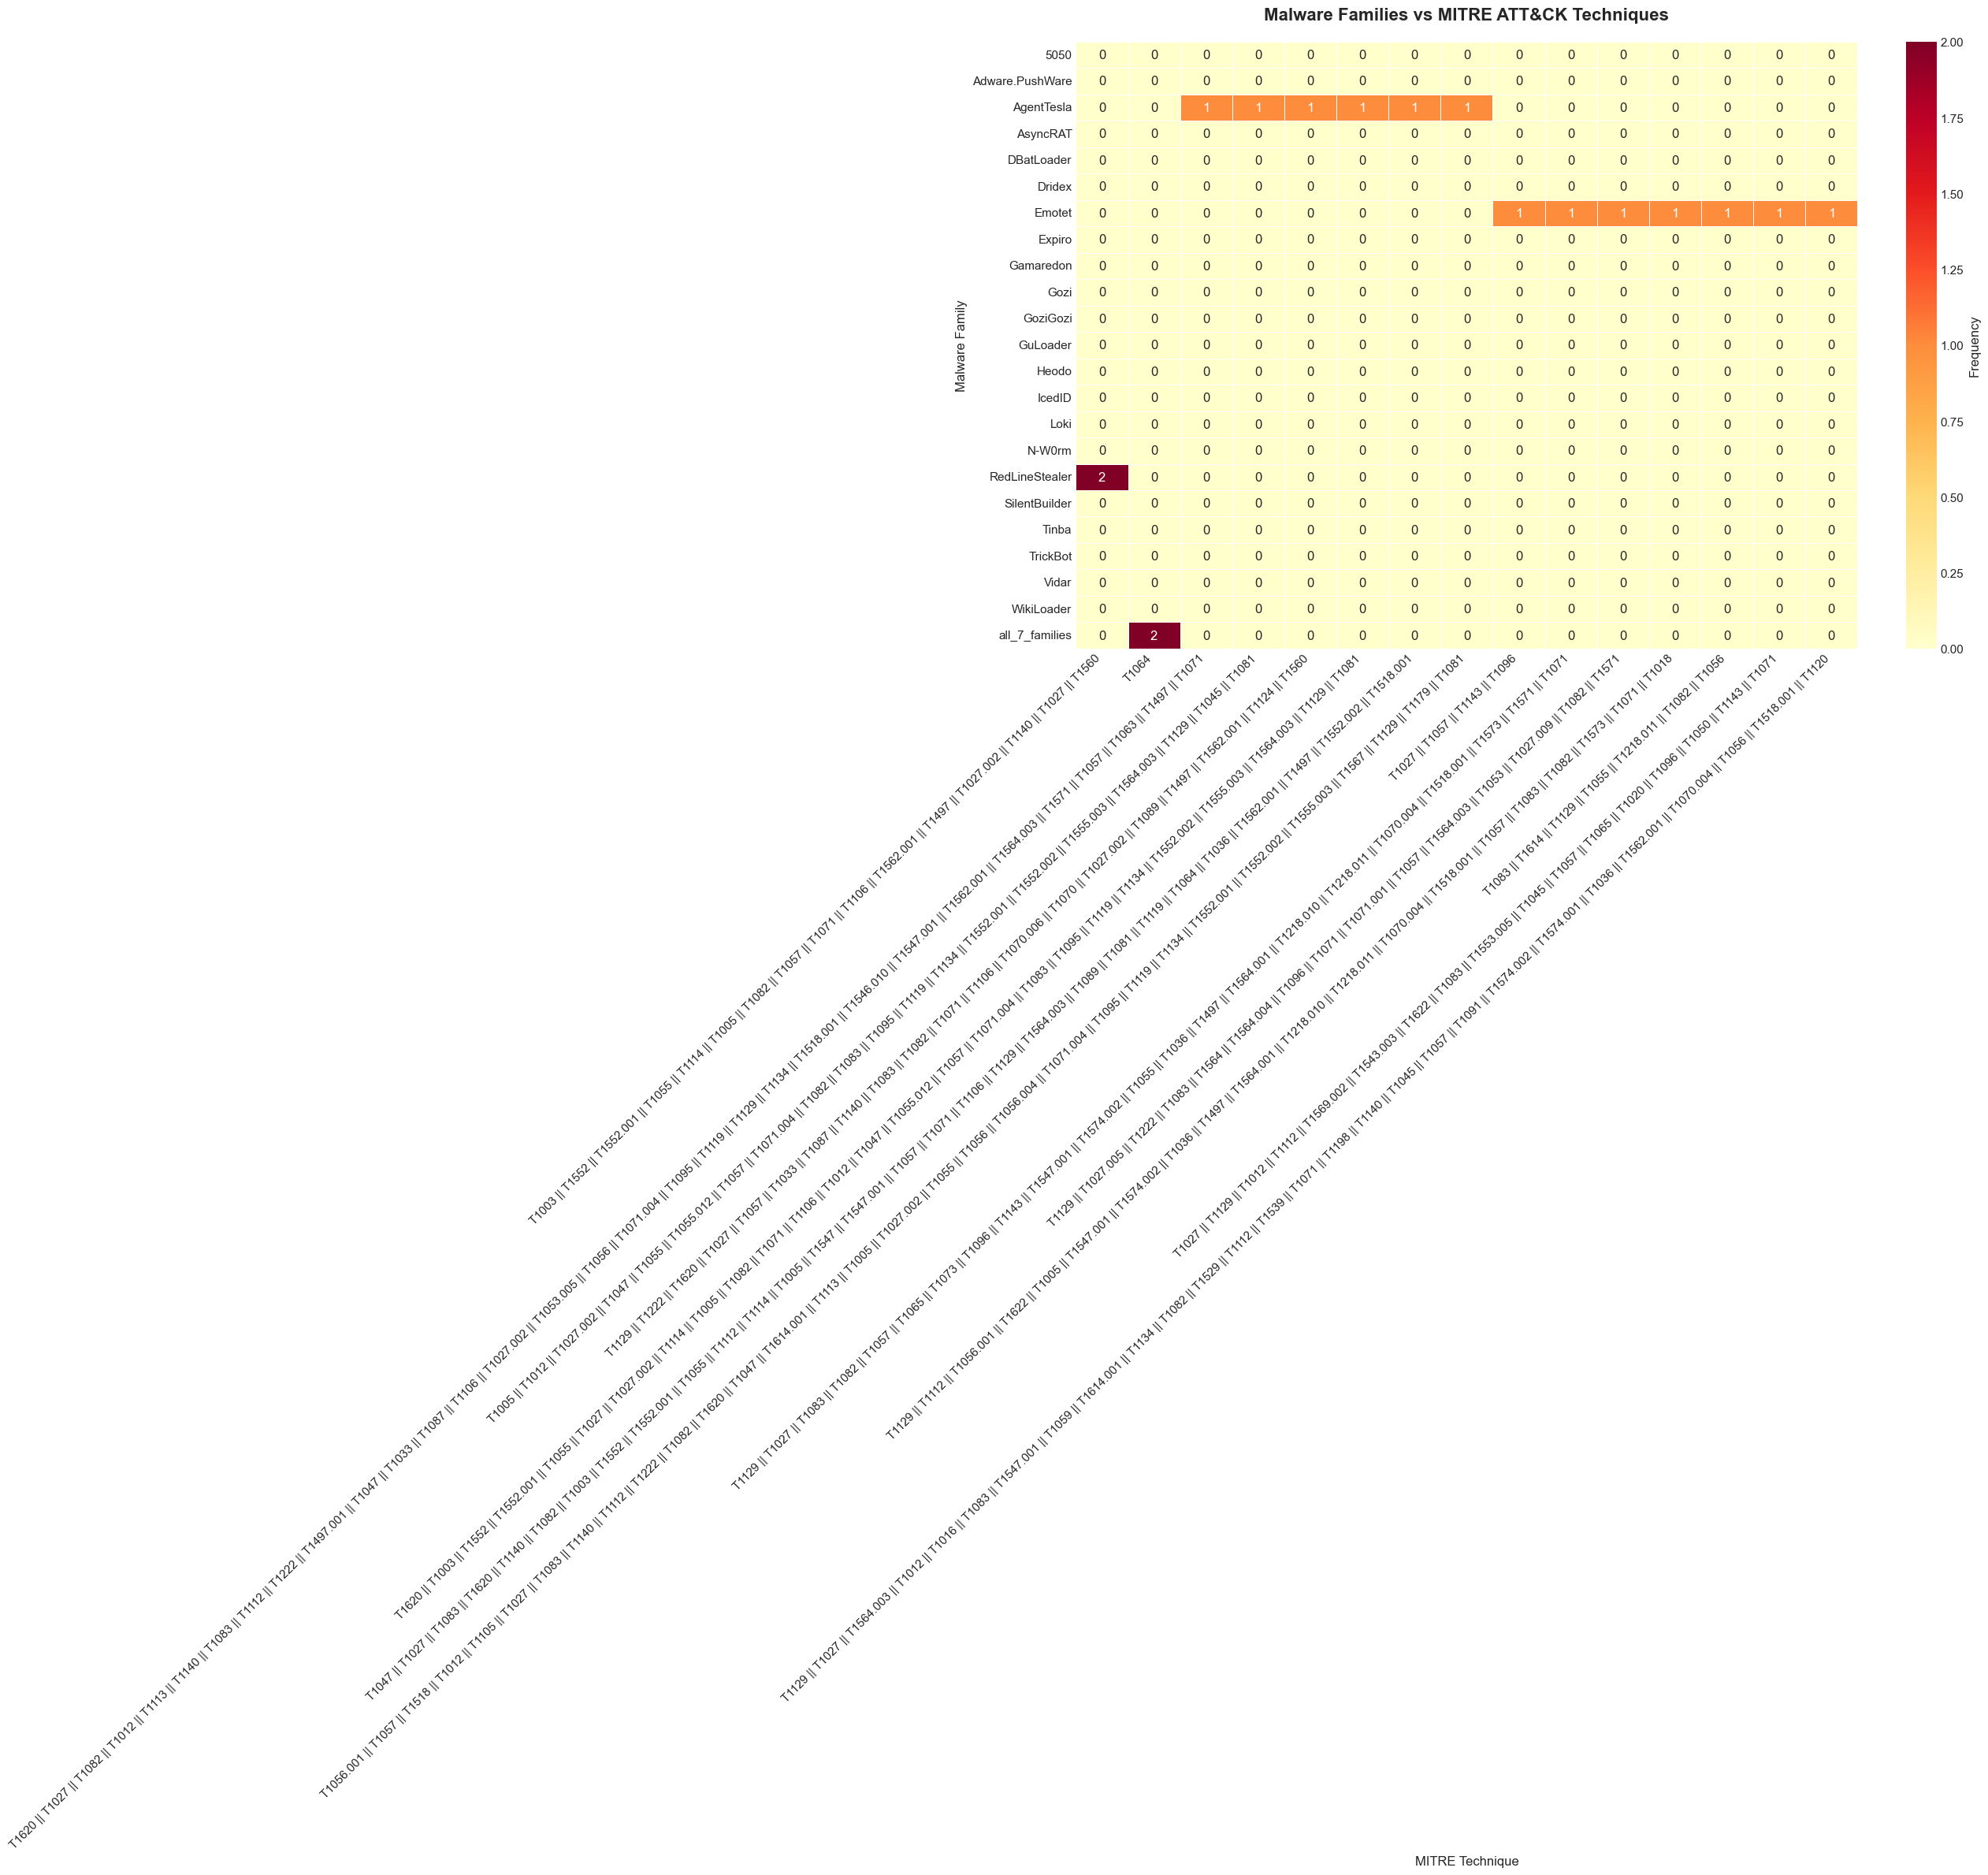


=== Family vs MITRE Techniques ===
Total unique families: 23
Total unique techniques: 78
Total technique occurrences: 78

Top Techniques:
  T1003 || T1552 || T1552.001 || T1055 || T1114 || T1005 || T1082 || T1057 || T1071 || T1106 || T1562.001 || T1497 || T1027.002 || T1140 || T1027 || T1560: 2 occurrences
  T1064: 2 occurrences
  T1620 || T1027 || T1082 || T1012 || T1113 || T1140 || T1083 || T1112 || T1222 || T1497.001 || T1047 || T1033 || T1087 || T1106 || T1027.002 || T1053.005 || T1056 || T1071.004 || T1095 || T1119 || T1129 || T1134 || T1518.001 || T1546.010 || T1547.001 || T1562.001 || T1564.003 || T1571 || T1057 || T1063 || T1497 || T1071: 1 occurrences
  T1005 || T1012 || T1027.002 || T1047 || T1055 || T1055.012 || T1057 || T1071.004 || T1082 || T1083 || T1095 || T1119 || T1134 || T1552.001 || T1552.002 || T1555.003 || T1564.003 || T1129 || T1045 || T1081: 1 occurrences
  T1129 || T1222 || T1620 || T1027 || T1057 || T1033 || T1087 || T1140 || T1083 || T1082 || T1071 || T1106 |

In [49]:
if df is not None and 'mitre_list' in df.columns and 'family' in df.columns:
    # Build a mapping of families to MITRE techniques
    family_mitre_matrix = {}
    
    for _, row in df.iterrows():
        family = row['family']
        techniques = row['mitre_list']
        
        if family not in family_mitre_matrix:
            family_mitre_matrix[family] = Counter()
        
        family_mitre_matrix[family].update(techniques)
    
    # Check if we have any MITRE data
    total_techniques = sum(len(techs) for techs in family_mitre_matrix.values())
    
    if total_techniques > 0:
        # Get top MITRE techniques across all families
        all_techs_counter = Counter()
        for techs in family_mitre_matrix.values():
            all_techs_counter.update(techs)
        
        top_techniques = [tech for tech, _ in all_techs_counter.most_common(15)]
        
        # Create matrix for heatmap
        matrix_data = pd.DataFrame(0, 
                                   index=sorted(family_mitre_matrix.keys()),
                                   columns=top_techniques)
        
        for family, techs in family_mitre_matrix.items():
            for tech in top_techniques:
                if tech in techs:
                    matrix_data.loc[family, tech] = techs[tech]
        
        # Plot heatmap
        plt.figure(figsize=(16, 10))
        sns.heatmap(matrix_data, annot=True, fmt='g', cmap='YlOrRd', 
                    cbar_kws={'label': 'Frequency'}, linewidths=0.5)
        plt.title('Malware Families vs MITRE ATT&CK Techniques', fontsize=16, fontweight='bold')
        plt.xlabel('MITRE Technique', fontsize=12)
        plt.ylabel('Malware Family', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()
        
        # Print summary statistics
        print('\n=== Family vs MITRE Techniques ===')
        print(f'Total unique families: {len(family_mitre_matrix)}')
        print(f'Total unique techniques: {len(all_techs_counter)}')
        print(f'Total technique occurrences: {total_techniques}')
        print('\nTop Techniques:')
        for tech, count in all_techs_counter.most_common(10):
            print(f'  {tech}: {count} occurrences')
    else:
        print('No MITRE technique data available - mitre_techniques column is empty')

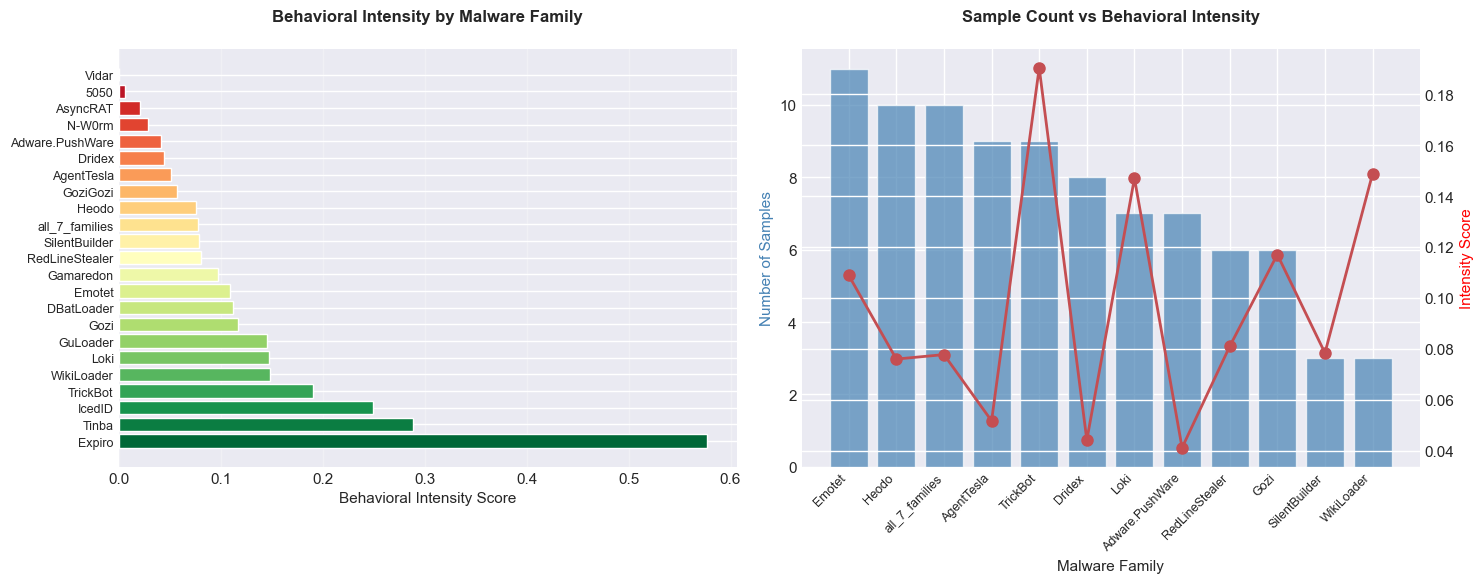


=== Top 10 Most Intense Families ===
family
Expiro        0.577
Tinba         0.288
IcedID        0.250
TrickBot      0.190
WikiLoader    0.149
Loki          0.147
GuLoader      0.145
Gozi          0.117
DBatLoader    0.112
Emotet        0.109
Name: intensity_score, dtype: float64


In [50]:
# 7. Family Analysis by Status and Behavior Intensity
# Create visualization of malware families ranked by behavioral intensity
if df is not None and 'family' in df.columns:
    # Calculate behavioral intensity score
    intensity_cols = ['process_count', 'http_request_count', 'dns_query_count', 'files_written_count', 'registry_written_count']
    available_intensity = [col for col in intensity_cols if col in df.columns]
    
    if available_intensity:
        # Create intensity score (normalized sum)
        df['intensity_score'] = 0
        for col in available_intensity:
            df['intensity_score'] += (df[col] - df[col].min()) / (df[col].max() - df[col].min() + 1)
        df['intensity_score'] = df['intensity_score'] / len(available_intensity)
        
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        
        # Left plot: Average intensity by family
        family_intensity = df.groupby('family')['intensity_score'].mean().sort_values(ascending=False)
        colors = plt.cm.RdYlGn_r(np.linspace(0, 1, len(family_intensity)))
        axes[0].barh(range(len(family_intensity)), family_intensity.values, color=colors)
        axes[0].set_yticks(range(len(family_intensity)))
        axes[0].set_yticklabels(family_intensity.index, fontsize=9)
        axes[0].set_xlabel('Behavioral Intensity Score', fontsize=11)
        axes[0].set_title('Behavioral Intensity by Malware Family', fontsize=12, fontweight='bold')
        axes[0].grid(axis='x', alpha=0.3)
        
        # Right plot: Sample count and intensity by family
        family_counts = df['family'].value_counts().head(12)
        family_avg_intensity = df.groupby('family')['intensity_score'].mean()[family_counts.index]
        
        x = range(len(family_counts))
        ax2 = axes[1]
        bars = ax2.bar(x, family_counts.values, alpha=0.7, label='Sample Count', color='steelblue')
        ax3 = ax2.twinx()
        line = ax3.plot(x, family_avg_intensity.values, 'ro-', linewidth=2, markersize=8, label='Avg Intensity')
        
        ax2.set_xlabel('Malware Family', fontsize=11)
        ax2.set_ylabel('Number of Samples', fontsize=11, color='steelblue')
        ax3.set_ylabel('Intensity Score', fontsize=11, color='red')
        ax2.set_xticks(x)
        ax2.set_xticklabels(family_counts.index, rotation=45, ha='right', fontsize=9)
        ax2.set_title('Sample Count vs Behavioral Intensity', fontsize=12, fontweight='bold')
        
        plt.tight_layout()
        plt.show()
        
        print("\n=== Top 10 Most Intense Families ===")
        print(family_intensity.head(10).round(3))

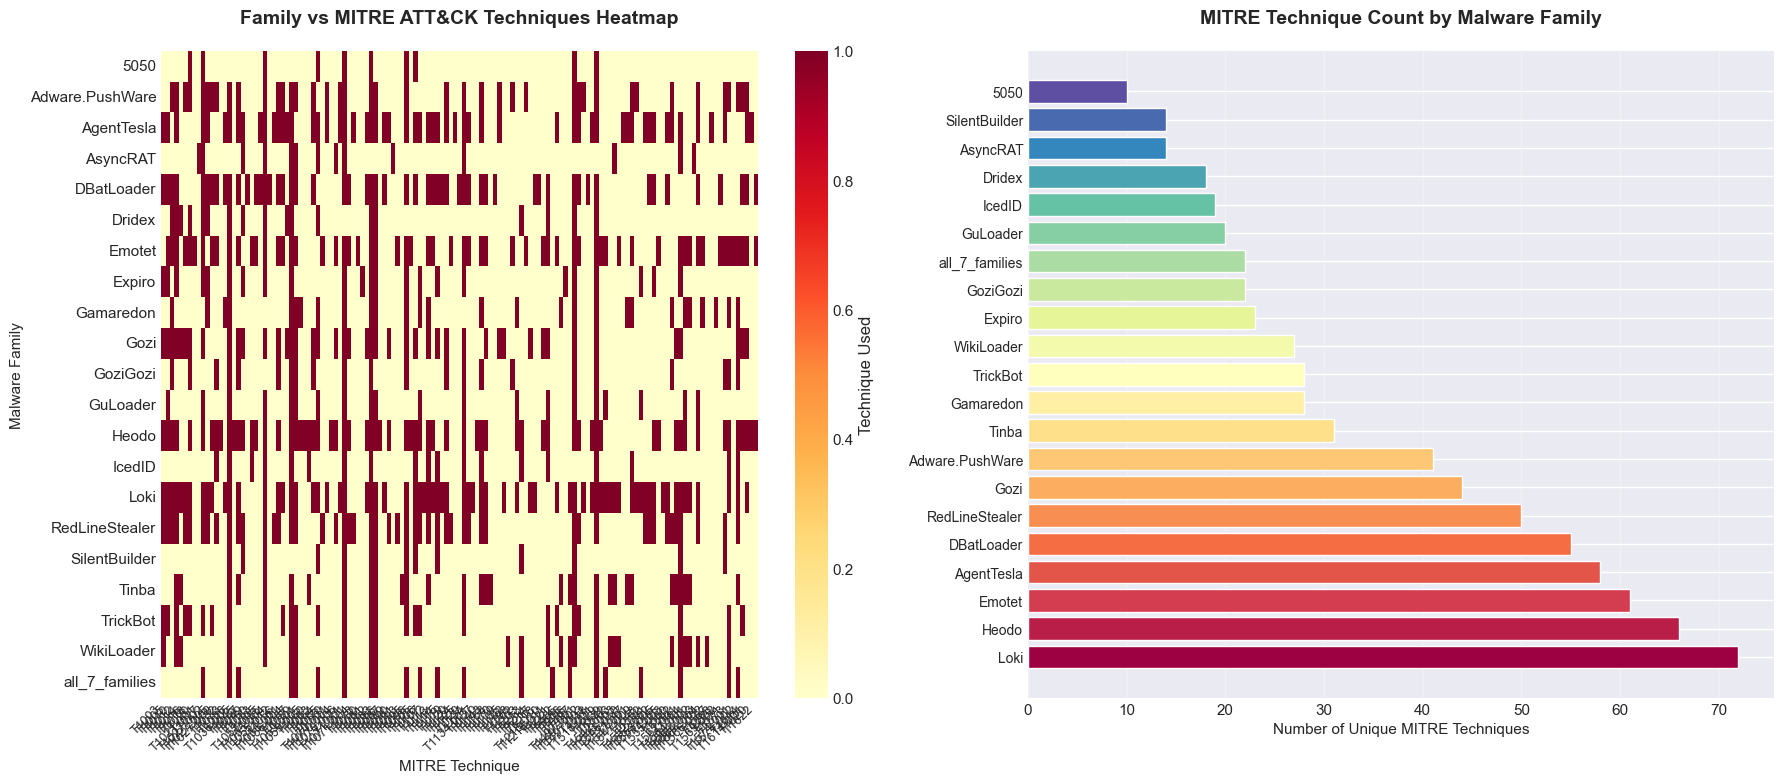


=== MITRE Techniques Summary ===
Loki                 → 72 techniques: T1112, T1543.003, T1012, T1027, T1134...
Heodo                → 66 techniques: T1112, T1614, T1012, T1027, T1070.004...
Emotet               → 61 techniques: T1112, T1543.003, T1614, T1564.004, T1027...
AgentTesla           → 58 techniques: T1112, T1179, T1012, T1567, T1027...
DBatLoader           → 55 techniques: T1112, T1614, T1012, T1027, T1053.005...
RedLineStealer       → 50 techniques: T1112, T1012, T1027, T1134, T1070.004...
Gozi                 → 44 techniques: T1112, T1179, T1012, T1614, T1027...
Adware.PushWare      → 41 techniques: T1179, T1012, T1614, T1027, T1070...
Tinba                → 31 techniques: T1112, T1485, T1012, T1542.003, T1057...
TrickBot             → 28 techniques: T1012, T1614, T1027, T1057, T1036...


In [51]:
## 8. Family vs MITRE ATT&CK Techniques
# Visualize which malware families use which MITRE techniques
if df is not None and 'mitre_techniques' in df.columns and 'family' in df.columns:
    # Parse MITRE techniques (separated by ||)
    def parse_techniques(tech_str):
        if pd.isna(tech_str) or tech_str == '':
            return []
        return [t.strip() for t in str(tech_str).split('||')]
    
    # Create family-technique mapping
    family_tech_map = {}
    for idx, row in df.iterrows():
        family = row['family']
        techniques = parse_techniques(row['mitre_techniques'])
        if techniques and techniques != ['']:
            if family not in family_tech_map:
                family_tech_map[family] = []
            family_tech_map[family].extend(techniques)
    
    # Get unique techniques per family
    family_tech_unique = {}
    for family, techs in family_tech_map.items():
        family_tech_unique[family] = list(set(techs))
    
    # Create heatmap data
    all_techniques = sorted(set([t for techs in family_tech_unique.values() for t in techs]))
    families = sorted(family_tech_unique.keys())
    
    heatmap_data = np.zeros((len(families), len(all_techniques)))
    for i, family in enumerate(families):
        for j, tech in enumerate(all_techniques):
            if tech in family_tech_unique[family]:
                heatmap_data[i, j] = 1
    
    # Create figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
    
    # Heatmap
    sns.heatmap(heatmap_data, xticklabels=all_techniques, yticklabels=families, 
                cmap='YlOrRd', cbar_kws={'label': 'Technique Used'}, ax=ax1)
    ax1.set_title('Family vs MITRE ATT&CK Techniques Heatmap', fontsize=14, fontweight='bold')
    ax1.set_xlabel('MITRE Technique', fontsize=11)
    ax1.set_ylabel('Malware Family', fontsize=11)
    plt.setp(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=9)
    
    # Count techniques per family (bar chart)
    tech_counts = [(family, len(family_tech_unique[family])) for family in families]
    tech_counts.sort(key=lambda x: x[1], reverse=True)
    families_sorted = [x[0] for x in tech_counts]
    counts_sorted = [x[1] for x in tech_counts]
    
    colors = plt.cm.Spectral(np.linspace(0, 1, len(families_sorted)))
    ax2.barh(range(len(families_sorted)), counts_sorted, color=colors)
    ax2.set_yticks(range(len(families_sorted)))
    ax2.set_yticklabels(families_sorted, fontsize=10)
    ax2.set_xlabel('Number of Unique MITRE Techniques', fontsize=11)
    ax2.set_title('MITRE Technique Count by Malware Family', fontsize=14, fontweight='bold')
    ax2.grid(axis='x', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("\n=== MITRE Techniques Summary ===")
    for family, techs in sorted(family_tech_unique.items(), key=lambda x: len(x[1]), reverse=True)[:10]:
        print(f"{family:20} → {len(techs)} techniques: {', '.join(techs[:5])}{'...' if len(techs) > 5 else ''}")

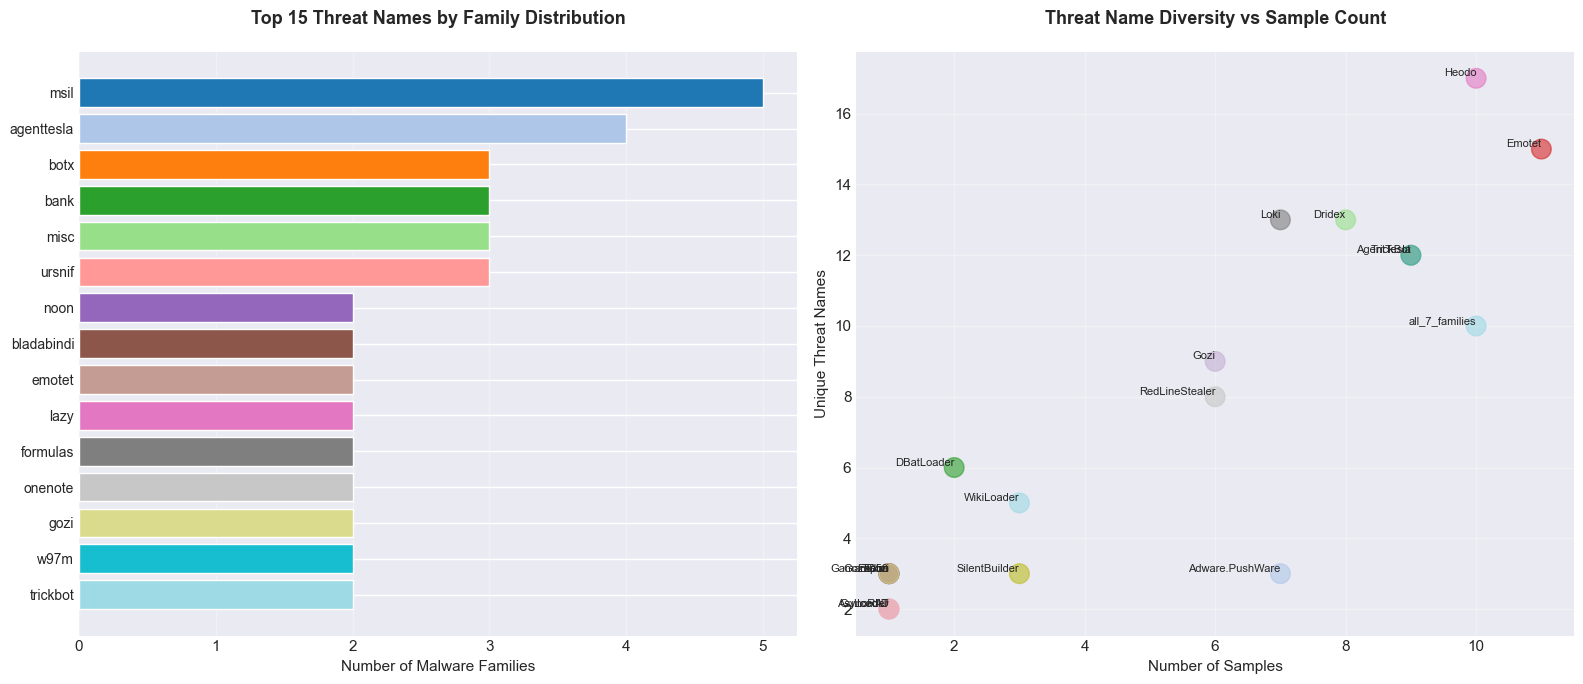


=== Threat Names Summary ===
Total unique threat names: 115

Top threat names:
  msil                           → Found in 5 families
  agenttesla                     → Found in 4 families
  botx                           → Found in 3 families
  bank                           → Found in 3 families
  misc                           → Found in 3 families
  ursnif                         → Found in 3 families
  noon                           → Found in 2 families
  bladabindi                     → Found in 2 families
  emotet                         → Found in 2 families
  lazy                           → Found in 2 families


In [52]:
## 9. Family vs Threat Names Distribution
# Visualize which threat names are associated with each malware family
if df is not None and 'threat_names' in df.columns and 'family' in df.columns:
    # Parse threat names (separated by ||)
    def parse_threat_names(threat_str):
        if pd.isna(threat_str) or threat_str == '':
            return []
        return [t.strip() for t in str(threat_str).split('||')]
    
    # Create family-threat mapping
    family_threat_map = {}
    for idx, row in df.iterrows():
        family = row['family']
        threats = parse_threat_names(row['threat_names'])
        if threats and threats != ['']:
            if family not in family_threat_map:
                family_threat_map[family] = []
            family_threat_map[family].extend(threats)
    
    # Get unique threats per family and count
    family_threat_unique = {}
    threat_family_count = {}
    for family, threats in family_threat_map.items():
        unique_threats = list(set(threats))
        family_threat_unique[family] = unique_threats
        for threat in unique_threats:
            if threat not in threat_family_count:
                threat_family_count[threat] = 0
            threat_family_count[threat] += 1
    
    # Sort threats by frequency
    top_threats = sorted(threat_family_count.items(), key=lambda x: x[1], reverse=True)[:15]
    threat_names_list = [t[0] for t in top_threats]
    threat_counts = [t[1] for t in top_threats]
    
    # Create figure with 2 subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
    
    # Left: Top threat names by family count
    colors = plt.cm.tab20(np.linspace(0, 1, len(threat_names_list)))
    ax1.barh(range(len(threat_names_list)), threat_counts, color=colors)
    ax1.set_yticks(range(len(threat_names_list)))
    ax1.set_yticklabels(threat_names_list, fontsize=10)
    ax1.set_xlabel('Number of Malware Families', fontsize=11)
    ax1.set_title('Top 15 Threat Names by Family Distribution', fontsize=13, fontweight='bold')
    ax1.invert_yaxis()
    ax1.grid(axis='x', alpha=0.3)
    
    # Right: Threats per family (scatter)
    families = sorted(family_threat_unique.keys())
    threat_counts_per_family = [len(family_threat_unique[f]) for f in families]
    samples_per_family = [df[df['family'] == f].shape[0] for f in families]
    
    scatter = ax2.scatter(samples_per_family, threat_counts_per_family, 
                         s=200, alpha=0.6, c=range(len(families)), cmap='tab20')
    
    # Label each point
    for i, family in enumerate(families):
        ax2.annotate(family, (samples_per_family[i], threat_counts_per_family[i]), 
                    fontsize=8, ha='right', va='bottom')
    
    ax2.set_xlabel('Number of Samples', fontsize=11)
    ax2.set_ylabel('Unique Threat Names', fontsize=11)
    ax2.set_title('Threat Name Diversity vs Sample Count', fontsize=13, fontweight='bold')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("\n=== Threat Names Summary ===")
    print(f"Total unique threat names: {len(threat_family_count)}")
    print("\nTop threat names:")
    for threat, count in top_threats[:10]:
        print(f"  {threat:30} → Found in {count} families")

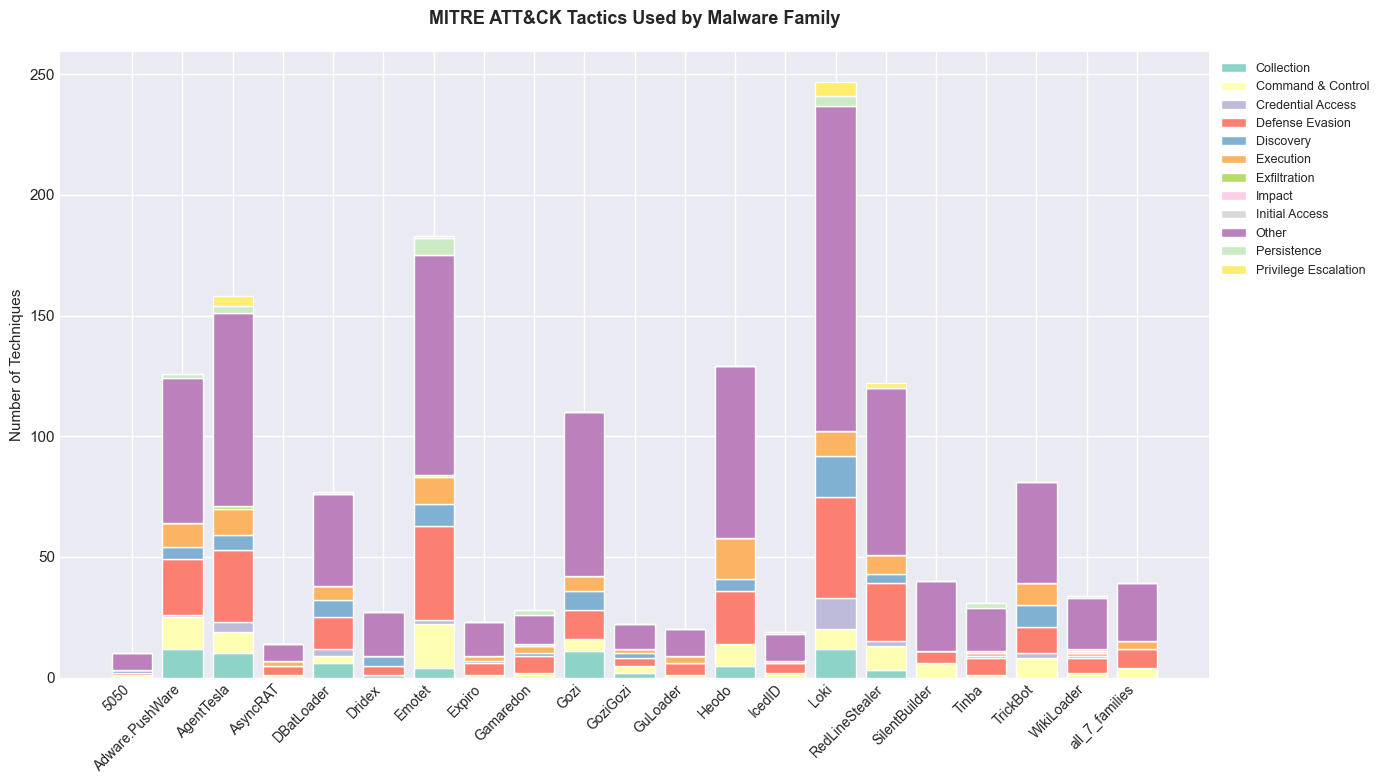


=== Tactic Distribution Summary ===
5050                 → 4 tactics used
Adware.PushWare      → 8 tactics used
AgentTesla           → 10 tactics used
AsyncRAT             → 4 tactics used
DBatLoader           → 8 tactics used
Dridex               → 4 tactics used
Emotet               → 10 tactics used
Expiro               → 5 tactics used


In [53]:
## 10. MITRE Technique Categories by Family
# Categorize techniques into ATT&CK tactics and show distribution
if df is not None and 'mitre_techniques' in df.columns:
    # MITRE ATT&CK Tactic mapping (sample - covers common techniques)
    tactic_map = {
        # Initial Access
        'T1566': 'Initial Access', 'T1566.001': 'Initial Access',
        # Execution
        'T1059': 'Execution', 'T1106': 'Execution', 'T1053': 'Execution', 'T1053.005': 'Execution',
        'T1129': 'Execution', 'T1204': 'Execution',
        # Persistence
        'T1547': 'Persistence', 'T1547.001': 'Persistence', 'T1543': 'Persistence', 'T1543.003': 'Persistence',
        'T1547.011': 'Persistence', 'T1547.013': 'Persistence', 'T1547.014': 'Persistence',
        # Privilege Escalation
        'T1548': 'Privilege Escalation', 'T1134': 'Privilege Escalation',
        # Defense Evasion
        'T1548': 'Defense Evasion', 'T1140': 'Defense Evasion', 'T1027': 'Defense Evasion', 
        'T1562': 'Defense Evasion', 'T1036': 'Defense Evasion', 'T1564': 'Defense Evasion',
        'T1564.004': 'Defense Evasion', 'T1070': 'Defense Evasion', 'T1070.004': 'Defense Evasion',
        'T1036.005': 'Defense Evasion', 'T1112': 'Defense Evasion', 'T1222': 'Defense Evasion',
        # Credential Access
        'T1056': 'Credential Access', 'T1056.004': 'Credential Access', 'T1056.001': 'Credential Access',
        'T1555': 'Credential Access', 'T1187': 'Credential Access', 'T1056.002': 'Credential Access',
        # Discovery
        'T1087': 'Discovery', 'T1010': 'Discovery', 'T1217': 'Discovery', 'T1580': 'Discovery',
        'T1526': 'Discovery', 'T1622': 'Discovery', 'T1538': 'Discovery', 'T1526': 'Discovery',
        'T1087.004': 'Discovery', 'T1087.001': 'Discovery', 'T1087.002': 'Discovery',
        'T1538': 'Discovery', 'T1526': 'Discovery', 'T1123': 'Discovery', 'T1119': 'Discovery',
        'T1185': 'Discovery', 'T1040': 'Discovery', 'T1007': 'Discovery', 'T1010': 'Discovery',
        'T1580': 'Discovery', 'T1622': 'Discovery', 'T1012': 'Discovery', 'T1018': 'Discovery',
        # Collection
        'T1557': 'Collection', 'T1123': 'Collection', 'T1115': 'Collection', 'T1530': 'Collection',
        'T1056': 'Collection', 'T1056.004': 'Collection', 'T1123': 'Collection', 'T1185': 'Collection',
        'T1113': 'Collection', 'T1115': 'Collection', 'T1119': 'Collection',
        # Command & Control
        'T1071': 'Command & Control', 'T1071.001': 'Command & Control', 'T1571': 'Command & Control',
        'T1008': 'Command & Control', 'T1573': 'Command & Control', 'T1573.001': 'Command & Control',
        'T1008': 'Command & Control', 'T1571': 'Command & Control', 'T1008': 'Command & Control',
        # Exfiltration
        'T1020': 'Exfiltration', 'T1030': 'Exfiltration', 'T1048': 'Exfiltration', 'T1041': 'Exfiltration',
        'T1048.003': 'Exfiltration', 'T1567': 'Exfiltration', 'T1567.002': 'Exfiltration', 'T1567.001': 'Exfiltration',
        # Impact
        'T1531': 'Impact', 'T1485': 'Impact', 'T1561': 'Impact', 'T1491': 'Impact',
    }
    
    # Extract tactics from techniques
    family_tactics = {}
    for idx, row in df.iterrows():
        family = row['family']
        techs_str = row['mitre_techniques']
        if pd.notna(techs_str) and techs_str != '':
            techniques = [t.strip() for t in str(techs_str).split('||')]
            if family not in family_tactics:
                family_tactics[family] = {}
            
            for tech in techniques:
                # Get base technique (T1234 instead of T1234.001)
                base_tech = tech.split('.')[0]
                tactic = tactic_map.get(tech, tactic_map.get(base_tech, 'Other'))
                family_tactics[family][tactic] = family_tactics[family].get(tactic, 0) + 1
    
    # Create stacked bar chart
    families = sorted(family_tactics.keys())
    tactics = sorted(set([t for tactics in family_tactics.values() for t in tactics.keys()]))
    
    data_matrix = []
    for family in families:
        row = [family_tactics[family].get(tactic, 0) for tactic in tactics]
        data_matrix.append(row)
    
    # Create figure
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Stacked bar chart
    bottom = np.zeros(len(families))
    colors_tac = plt.cm.Set3(np.linspace(0, 1, len(tactics)))
    
    for i, tactic in enumerate(tactics):
        values = [data_matrix[j][i] for j in range(len(families))]
        ax.bar(range(len(families)), values, bottom=bottom, label=tactic, color=colors_tac[i])
        bottom += values
    
    ax.set_xticks(range(len(families)))
    ax.set_xticklabels(families, rotation=45, ha='right', fontsize=10)
    ax.set_ylabel('Number of Techniques', fontsize=11)
    ax.set_title('MITRE ATT&CK Tactics Used by Malware Family', fontsize=13, fontweight='bold')
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=9)
    plt.tight_layout()
    plt.show()
    
    print("\n=== Tactic Distribution Summary ===")
    for family in families[:8]:
        tactics_count = len(family_tactics[family])
        print(f"{family:20} → {tactics_count} tactics used")